Analyzing ADWIN Data

In [3]:
import random
from river import drift
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Look at EDDM next

In [ ]:
df_time_a

In [4]:
file_time_a = '../time_a_df_test.csv'
file_time_b = '../time_b_df_test.csv'
df_time_a = pd.read_csv(file_time_a)
df_time_b = pd.read_csv(file_time_b)

# Load
file = '../fakedata.csv'  # Update later
df = pd.read_csv(file)
df = df[['Time Period','UserID','Date','Value 1']]

# Delete later if not needed
df['Date'] = pd.to_datetime(df['Date'])

time_a_values = df[df["Time Period"] == "Time A"]["Value 1"]
time_b_values = df[df["Time Period"] == "Time B"]["Value 1"]

# Combine for continuous analysis
combined_values = pd.concat([time_a_values, time_b_values]).reset_index(drop=True)
date_average = df.groupby('Date')['Value 1'].mean()


In [62]:
user_groups = {user_id: group for user_id, group in df.groupby('UserID')}

Change detected at index 26, input value: 33.50227528
1
33.62088344392857
120.86781001057342


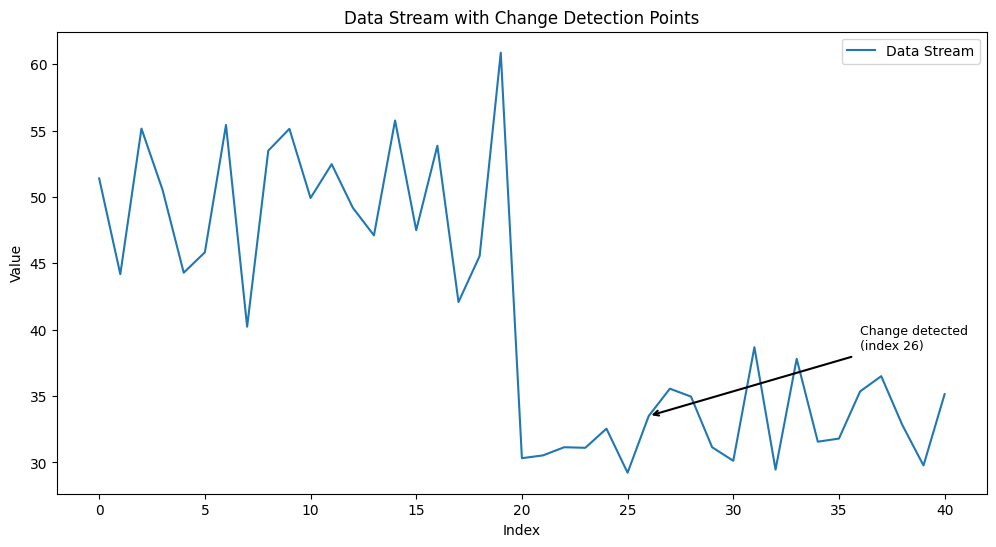

In [87]:
adwin = drift.ADWIN(delta = .05, # significance value
                    clock=1, # how often ADWIN should check for changes
                    min_window_length=4, #Min length allowerd when checking concept drift, smaller may decrease delay but lead to false positives
                    grace_period=0) #when to start looking

data_stream = [float(value) for value in date_average.values]

change_points = []
for i, val in enumerate(data_stream):
    adwin.update(val)
    if adwin.drift_detected:
        print(f"Change detected at index {i}, input value: {val}")
        print(adwin.n_detections)
        change_points.append((i,val))
print(adwin.estimation)
print(adwin.variance)


plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(data_stream)), y=data_stream, label="Data Stream")

for idx, val in change_points:
    plt.annotate(
        f"Change detected\n(index {idx})", 
        xy=(idx, val), 
        xytext=(idx + 10, val + 5),
        arrowprops=dict(arrowstyle="->", lw=1.5),
        fontsize=9,
        backgroundcolor='white'
    )

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Data Stream with Change Detection Points")
plt.legend()
plt.show()

In [97]:
adwin_all = drift.ADWIN(delta = .001, # significance value
                    clock=1, # how often ADWIN should check for changes
                    min_window_length=4, #Min length allowerd when checking concept drift, smaller may decrease delay but lead to false positives
                    grace_period=0)
change_points = []
for i, val in enumerate(data_stream):
    adwin.update(val)
    if adwin.drift_detected:
        print(f"Change detected at index {i}, input value: {val}")
        print(adwin.n_detections)
        change_points.append((i, val))

Change detected at index 28, input value: 34.961490525
1


<Axes: >

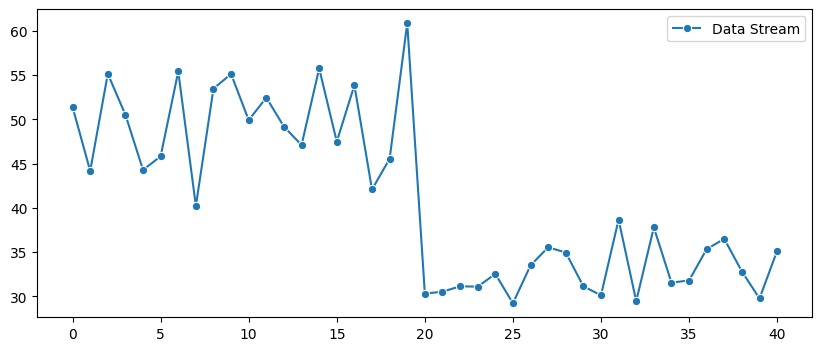

In [92]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=np.arange(i+1), y=data_stream, marker="o", label="Data Stream")

User 123 ADWIN window width: 18.0



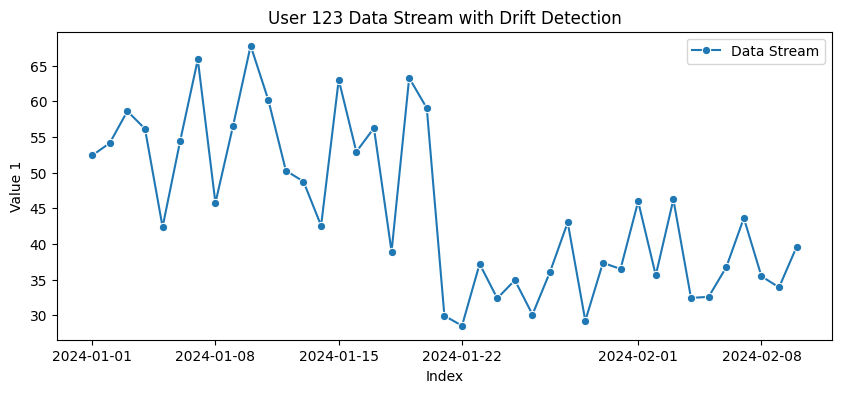

User 124 ADWIN window width: 2.0



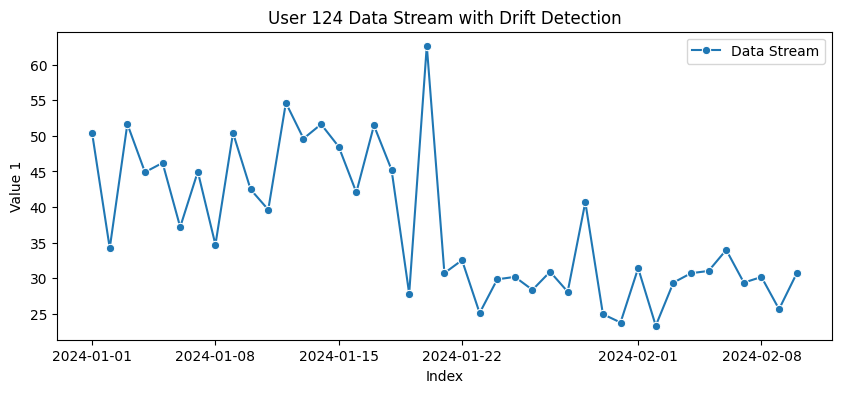

In [68]:
for user_id, group in user_groups.items():
    group.set_index(group['Date'],inplace=True)
    adwin_by_user = drift.ADWIN(delta = .7,
                    clock=1,
                    min_window_length=1,
                    grace_period=0) # Create a new ADWIN instance for this user
    change_points = []  # To store (index, value) for detected drifts

    # Process the data stream for the current user.
    for i, row in group.iterrows():
        value = row['Value 1']
        # Update ADWIN; the update method returns True if a change is detected.
        if adwin_by_user.update(value):
            print(f"User {user_id}: Change detected at index {i}, input value: {value}")
            change_points.append((i, value))

    # Optionally, print ADWIN's current window length
    print(f"User {user_id} ADWIN window width: {adwin_by_user.width}\n")

    # Plot the user's data stream using Seaborn.
    plt.figure(figsize=(10, 4))
    sns.lineplot(x=group.index, y=group['Value 1'], marker="o", label="Data Stream")

    # Annotate each detected change point.
    for idx, val in change_points:
        plt.annotate(
            f"Change at {idx}", 
            xy=(idx, val), 
            xytext=(idx, val + 1),
            arrowprops=dict(arrowstyle="->", lw=1.5),
            fontsize=9
        )

    plt.title(f"User {user_id} Data Stream with Drift Detection")
    plt.xlabel("Index")
    plt.ylabel("Value 1")
    plt.legend()
    plt.show()

Change detected at index 8, input value: 53.482535659999996
1
Change detected at index 30, input value: 30.128010365
1
33.889877984499996
96.27899505110847


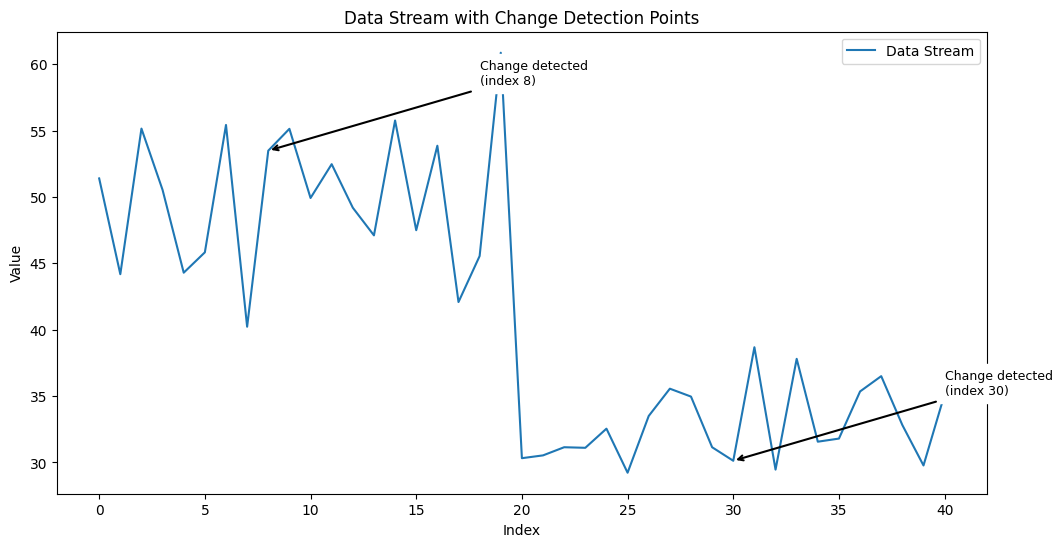